<a href="https://colab.research.google.com/github/sandyzden/DLAssignment/blob/main/DLAssignmentProblem2Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import io
import pandas as pd


In [8]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [9]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Part - 1
1) Importing the Required Libraries 

2) Importing the dataset

3) Check if the GPU is enabled


In [76]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import gensim
import nltk
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
import re
import logging
import numpy as np


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras.models import Sequential
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [11]:
id = '1eULXfjvCrAms_RipkSnXmvZl5Td2j3vn'

In [12]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training.1600000.processed.noemoticon.csv')  


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

In [13]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]

In [14]:
df3 = pd.read_csv('training.1600000.processed.noemoticon.csv', sep=',', engine='python', names=DATASET_COLUMNS)

In [15]:
df3.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [16]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [17]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Part - 2
1) Print at least 2 tweets from each class


In [18]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}

In [19]:
def decode_sentiment(label):
    return decode_map[int(label)]

In [20]:
%%time
df3.target = df3.target.apply(lambda x: decode_sentiment(x))

CPU times: user 449 ms, sys: 0 ns, total: 449 ms
Wall time: 450 ms


In [21]:
df3[df3['target'] == 'POSITIVE'].head(5)

,target,ids,date,flag,user,text
800000,POSITIVE,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,POSITIVE,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,POSITIVE,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,POSITIVE,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,POSITIVE,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [22]:
df3[df3['target'] == 'NEGATIVE'].head(5)

,target,ids,date,flag,user,text
0,NEGATIVE,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,NEGATIVE,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,NEGATIVE,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,NEGATIVE,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,NEGATIVE,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'Dataset labels distribuition')

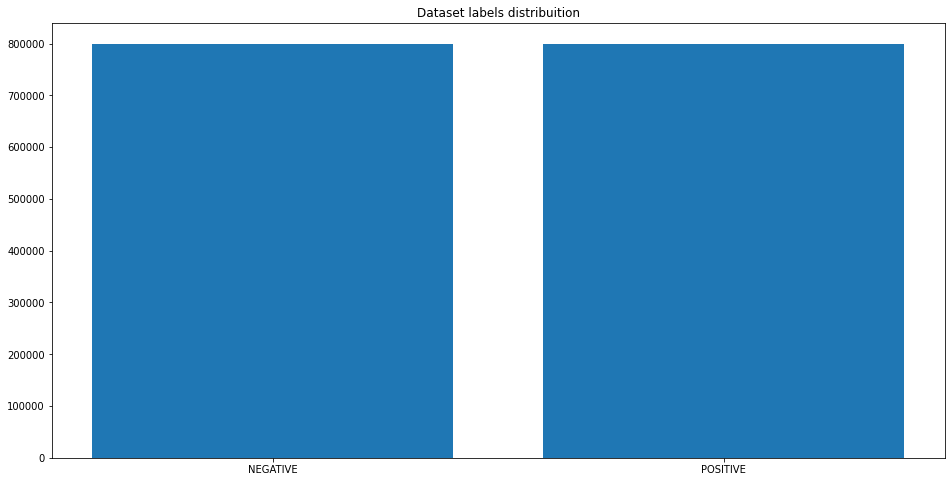

In [23]:
target_cnt = Counter(df3.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [31]:
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10


In [37]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [42]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)


In [43]:
%%time
df3.text = df3.text.apply(lambda x: preprocess(x))

CPU times: user 37.1 s, sys: 116 ms, total: 37.2 s
Wall time: 37.2 s


In [51]:
df3.text

0               awww bummer shoulda got david carr third day
1          upset update facebook texting might cry result...
2          dived many times ball managed save 50 rest go ...
3                           whole body feels itchy like fire
4                                           behaving mad see
                                 ...                        
1599995                        woke school best feeling ever
1599996             thewdb com cool hear old walt interviews
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1600000, dtype: object

In [53]:
df_train, df_test = train_test_split(df3, test_size=0.2, random_state=42)

In [54]:
df_train.shape

(1280000, 6)

In [55]:
df_test.shape

(320000, 6)

In [56]:
%%time
documents = [_text.split() for _text in df_train.text] 

CPU times: user 2.92 s, sys: 215 ms, total: 3.14 s
Wall time: 3.14 s


In [57]:
documents

[['ya',
  'quot',
  'like',
  'palm',
  'pre',
  'touchstone',
  'charger',
  'readynow',
  'yes',
  'sounds',
  'good',
  'beer',
  'ready',
  'prelaunch'],
 ['felt', 'earthquake', 'afternoon', 'seems', 'epicenter'],
 ['ruffles', 'shirts', 'like', 'likey'],
 ['pretty',
  'bad',
  'night',
  'crappy',
  'morning',
  'fml',
  'buttface',
  'didnt',
  'say',
  'could',
  'go',
  'work',
  'today'],
 ['yeah', 'clear', 'view'],
 ['one',
  'time',
  'follow',
  'fam',
  'ff',
  'georgeann13',
  'nakithebeatman',
  'flimackgod',
  'chaz81',
  'djt',
  'elle',
  'jaejaedynomite',
  'welcome',
  'friday',
  'follow',
  '2'],
 ['u', 'rock', 'thanks', 'added', 'next', 'robcrotch', 'tm', 'video'],
 ['yes',
  'please',
  'met',
  'fiancee',
  'ian',
  'party',
  'day',
  'btw',
  'sweet',
  'congrats',
  'guys'],
 ['gawd',
  'finished',
  'whole',
  'bowl',
  'even',
  'posted',
  'previous',
  'tweet',
  'making',
  '2nd',
  'bowl'],
 ['awesome', 'game', 'short', 'finish', 'craving', 'god', 'war'

In [58]:
w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=7, 
                                            min_count=10, 
                                            workers=8)

In [59]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [60]:
w2v_model.build_vocab(documents)

In [61]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 30369


In [62]:
words

dict_keys(['ya', 'quot', 'like', 'palm', 'pre', 'charger', 'yes', 'sounds', 'good', 'beer', 'ready', 'prelaunch', 'felt', 'earthquake', 'afternoon', 'seems', 'shirts', 'likey', 'pretty', 'bad', 'night', 'crappy', 'morning', 'fml', 'didnt', 'say', 'could', 'go', 'work', 'today', 'yeah', 'clear', 'view', 'one', 'time', 'follow', 'fam', 'ff', 'elle', 'welcome', 'friday', '2', 'u', 'rock', 'thanks', 'added', 'next', 'tm', 'video', 'please', 'met', 'fiancee', 'ian', 'party', 'day', 'btw', 'sweet', 'congrats', 'guys', 'gawd', 'finished', 'whole', 'bowl', 'even', 'posted', 'previous', 'tweet', 'making', '2nd', 'awesome', 'game', 'short', 'finish', 'craving', 'god', 'war', 'action', 'happy', 'mothers', 'grown', 'n', 'amp', 'lil', 'prego', 'lol', 'playing', 'everyone', 'loved', 'bless', 'back', 'eating', 'dinner', 'chat', 'room', 'many', 'heck', 'way', 'heights', 'want', 'trade', 'tired', 'saying', 'goodbye', 'chicago', 'stole', 'half', '12', 'mai', 'tai', 'inbound', 'suddenly', 'trouble', 'rel

In [63]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=32)

CPU times: user 17min 40s, sys: 3.2 s, total: 17min 43s
Wall time: 9min 1s


(263119010, 295270528)

In [67]:
w2v_model.most_similar("love")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('luv', 0.5756717324256897),
 ('loves', 0.5625866651535034),
 ('loved', 0.542504072189331),
 ('adore', 0.5385501384735107),
 ('amazing', 0.5114322900772095),
 ('looove', 0.4977729022502899),
 ('awesome', 0.4701705873012543),
 ('loveee', 0.469772607088089),
 ('loooove', 0.4626381993293762),
 ('lovee', 0.4520612359046936)]

In [69]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 290419
CPU times: user 14.2 s, sys: 39 ms, total: 14.2 s
Wall time: 14.2 s


In [70]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=300)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=300)

CPU times: user 22.9 s, sys: 584 ms, total: 23.5 s
Wall time: 23.5 s


In [73]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (1280000, 1)
y_test (320000, 1)


In [74]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (1280000, 300)
y_train (1280000, 1)

x_test (320000, 300)
y_test (320000, 1)


In [77]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(290419, 300)


In [81]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=300, trainable=False)

In [84]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          87125700  
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 87,286,201
Trainable params: 160,501
Non-trainable params: 87,125,700
_________________________________________________________________


In [85]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [88]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=1024,
                    epochs=32,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/32
 131/1125 [==>...........................] - ETA: 10:33 - loss: 0.5540 - accuracy: 0.7135